In [12]:
import numpy as np
import matplotlib.pyplot as plt
import csv
%matplotlib inline

In [13]:
data = np.loadtxt('../tests/timings.csv', skiprows=1)

# sort 
data = data[data[:,0].argsort()]
procs = data[:,0]

# get header
with open('../tests/timings.csv', 'r') as f:
    reader = csv.reader(f, delimiter=' ')
    for r, row in enumerate(reader):
        header = row
        break

In [14]:
# construct dictionary
d = dict()
for i in xrange(1,len(header)):
    key = header[i]
    d[key] = data[:,i]

- Strong scaling: fixed number of points, increasing number of processors
- Weak scaling: workload assigned to each processor stays constant

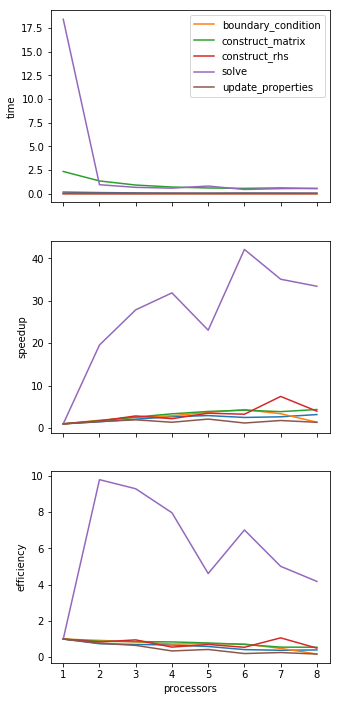

In [31]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1, sharex=True, figsize=(5,12))

ax1.set_ylabel('time')
ax2.set_ylabel('speedup')
ax3.set_ylabel('efficiency')
ax3.set_xlabel('processors')


for key in header[1:]:
    t = d[key]   # time
    S = t[0]/t   # speedup
    E = S/procs  # efficiency
    
    ax1.plot(procs, t, label=key)
    ax2.plot(procs, S, label=key)
    ax3.plot(procs, E, label=key)
    
ax1.legend()
fig.savefig('scaling_all.png', bbox_inches='tight')

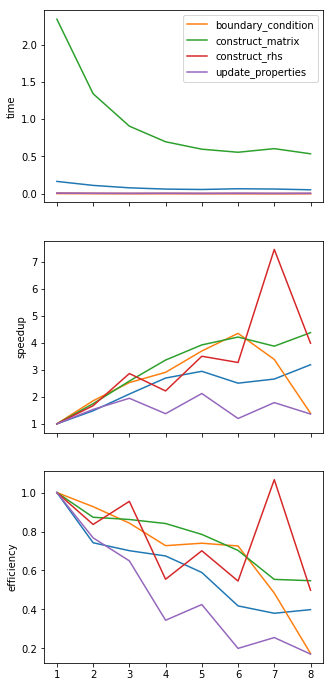

In [32]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1, sharex=True, figsize=(5,12))

ax1.set_ylabel('time')
ax2.set_ylabel('speedup')
ax3.set_ylabel('efficiency')

# for ax in [ax1, ax2, ax3]:
#     ax.set_yscale('log')


for key in header[1:]:
    if key == 'solve':
        pass
    else:
        t = d[key]   # time
        S = t[0]/t   # speedup
        E = S/procs  # efficiency

        ax1.plot(procs, t, label=key)
        ax2.plot(procs, S, label=key)
        ax3.plot(procs, E, label=key)

ax1.legend()
fig.savefig('scaling_nosolver.png', bbox_inches='tight')